What is the advantage of using sequential learning for fitting linear model over the analytical solution?

The advantage of using sequential learning are the following:
    - It is more efficient in terms of memory usage, as it does not require to store the entire dataset in memory.
    - It is more efficient in terms of computation, as it does not require to compute the inverse of the matrix X^T X, which can be computationally expensive.
    - It is more flexible, as it allows to update the model with new data without having to retrain the model from scratch.
    - It generalizes better, as it overfits less to the training data, since it updates the model parameters incrementally.


What is the geometrical meaning of the least square solution to linear regression?

The least square solution to linear regression corresponds to the projection of the target variable y onto the column space of the feature matrix X.

Proof:
Let $ X $ be the feature matrix of shape $ n \times p $, where $ n $ is the number of samples and $ p $ is the number of features, and $ y $ be the target variable of shape $ n \times 1 $.

Least squares aims to minimize the sum of squared errors between the target variable $ y $ and the predicted target variable $ \hat{y} = X \beta $, where $ \beta $ is the vector of coefficients of shape $ p \times 1 $.

The sum of squared errors can be written as:
$ || y - X \beta ||^2 = (y - X \beta)^T (y - X \beta) = y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta $

Taking the derivative with respect to $ \beta $ and setting it to zero, we get:
$ -2 X^T y + 2 X^T X \beta = 0 $
$ X^T X \beta = X^T y $

Therefore, the least squares solution is given by:
$ \beta = (X^T X)^{-1} X^T y $

Which is the projection of the target variable $ y $ onto the column space of the feature matrix $ X $.


Why does L1 regularization tend to make coefficients vanish exactly, while L2 doesn’t?

L1 regularization tends to make coefficients vanish can be explained in two ways:
    - L1 regularization uses the L1 norm of the coefficients as the penalty term, which is the sum of the absolute values of the coefficients. This penalty term has sharp corners at the axes, which makes it more likely to push the coefficients to exactly zero, leading to sparsity in the model.
    $ L1: || \beta ||_1 = \sum_{i=1}^{p} | \beta_i | $  
    $ \beta \leftarrow \beta - \alpha \left( \frac{\partial L}{\partial \beta} + \lambda \text{sign}(\beta) \right) $  
    - L1 regularization is not differentiable at zero, which means that the gradient of the penalty term is not defined at zero. This makes it more likely for the optimization algorithm to converge to a solution where some coefficients are exactly zero.
    
![alt text](L1.png "Title")

What is the bias-variance tradeoff?

High Bias, Low Variance: A simple model (e.g., a linear model for a complex relationship) will have high bias because it can't capture the complexity of the data, but it will have low variance because it won't be sensitive to small fluctuations in the training data.

Low Bias, High Variance: A more complex model (e.g., polynomial regression with high-degree terms) will have low bias because it can capture more of the data's complexity, but it will have high variance because it will be sensitive to noise and may overfit the training data.

In [39]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [40]:
import pandas as pd

california_df = pd.DataFrame(california.data,
                             columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [42]:
sample_df = california_df.sample(frac=0.1, random_state=17)
print(sample_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
18403  5.4741      24.0  6.587799   1.060181      4017.0  3.311624     37.24   
13405  1.9583       7.0  5.362805   1.442073      1064.0  3.243902     34.10   
9539   2.6058      40.0  3.885714   0.914286       785.0  4.485714     37.39   
8668   4.5817      30.0  4.146135   1.108696      1526.0  1.842995     33.82   
9019   8.0137       9.0  7.734673   1.041211     12873.0  3.274739     34.16   
...       ...       ...       ...        ...         ...       ...       ...   
19279  1.9458      26.0  4.709677   1.020161       937.0  3.778226     38.42   
12378  1.3801      25.0  4.737500   1.725000       604.0  2.516667     33.78   
16068  3.7361      48.0  5.754617   1.105541      1041.0  2.746702     37.75   
16563  5.0176      19.0  6.061538   0.956410      1264.0  3.241026     37.77   
12071  5.2898      25.0  6.722008   1.028958      3240.0  3.127413     33.86   

       Longitude  MedHouseValue  
18403

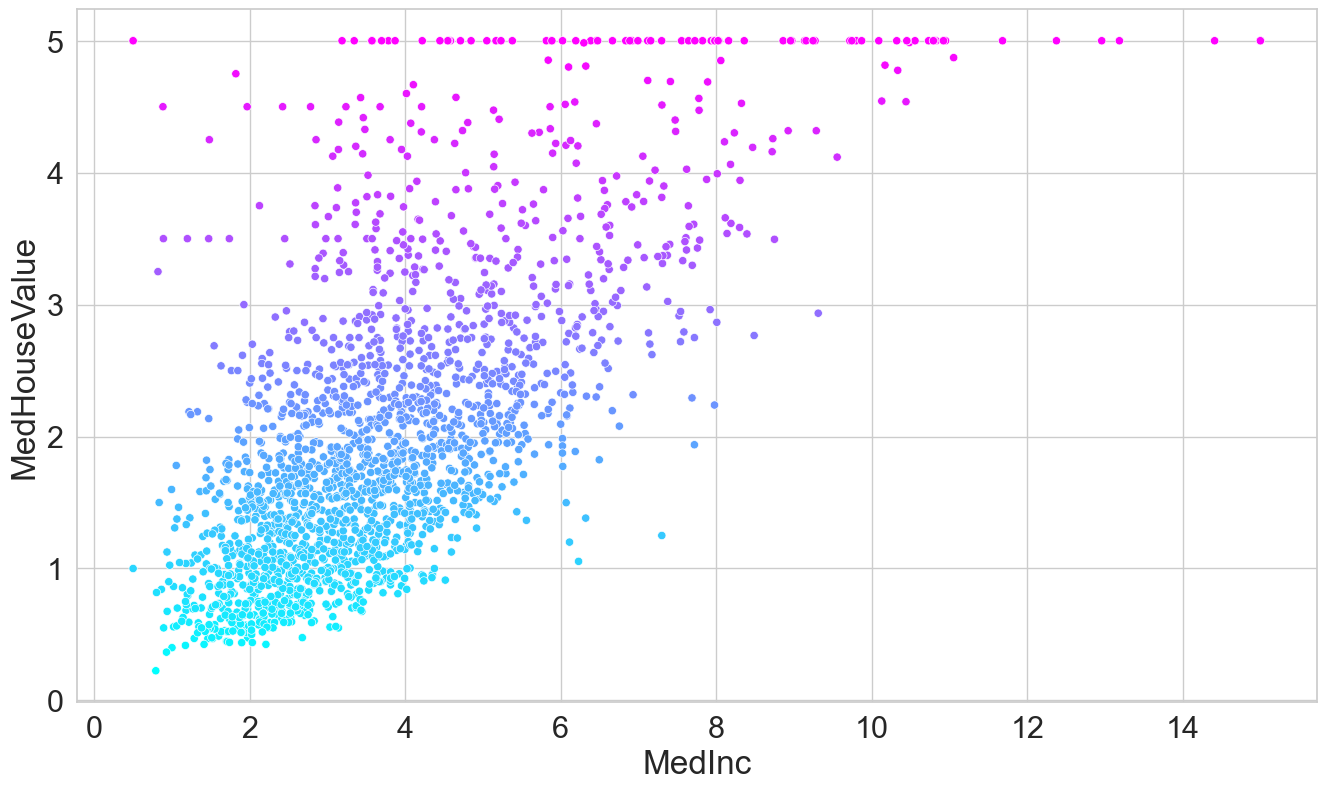

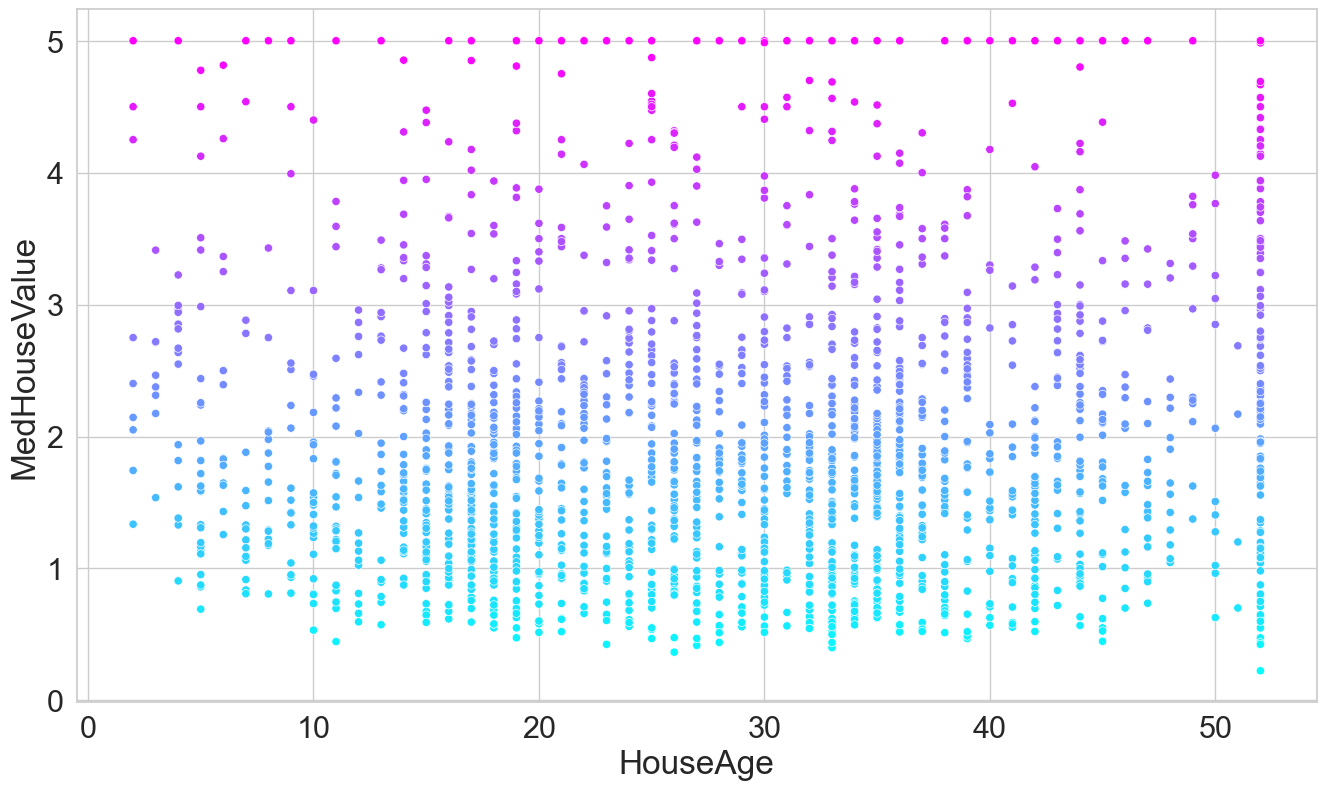

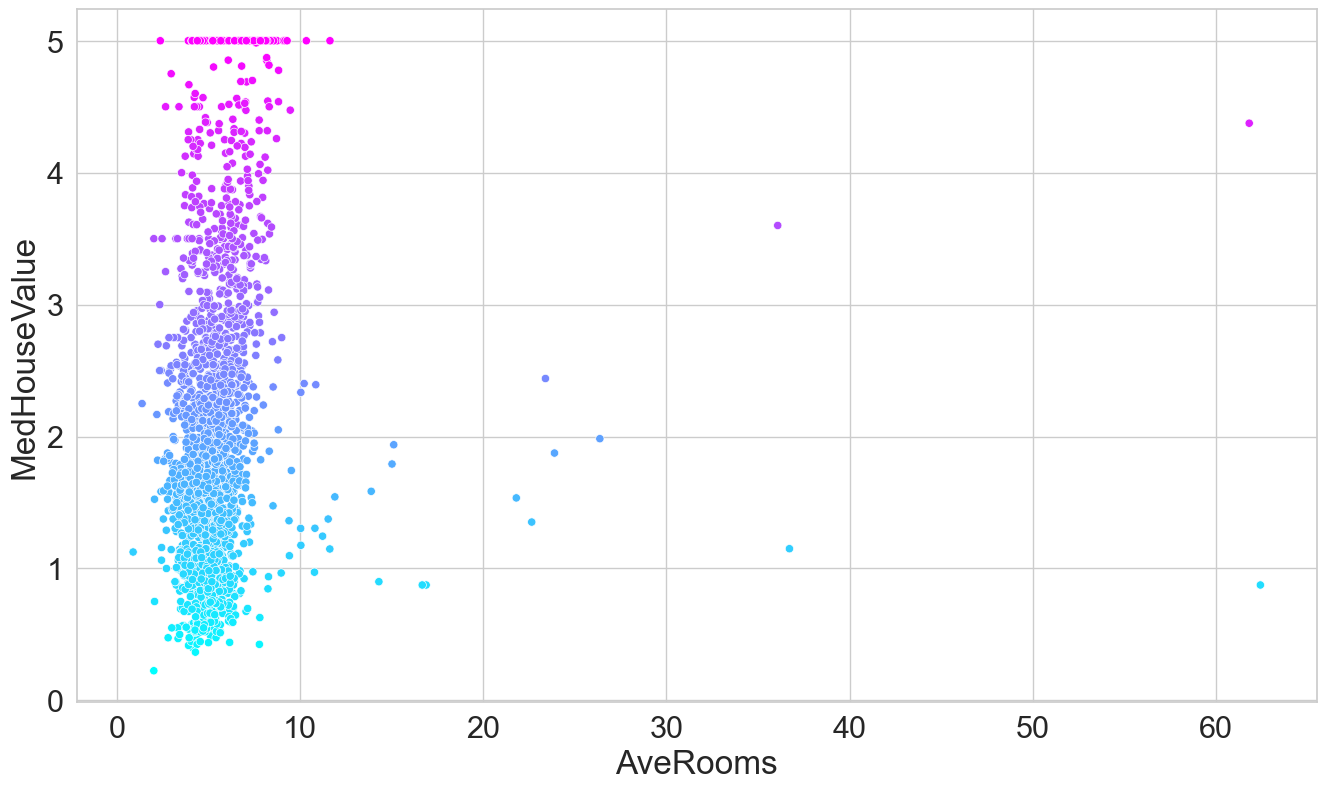

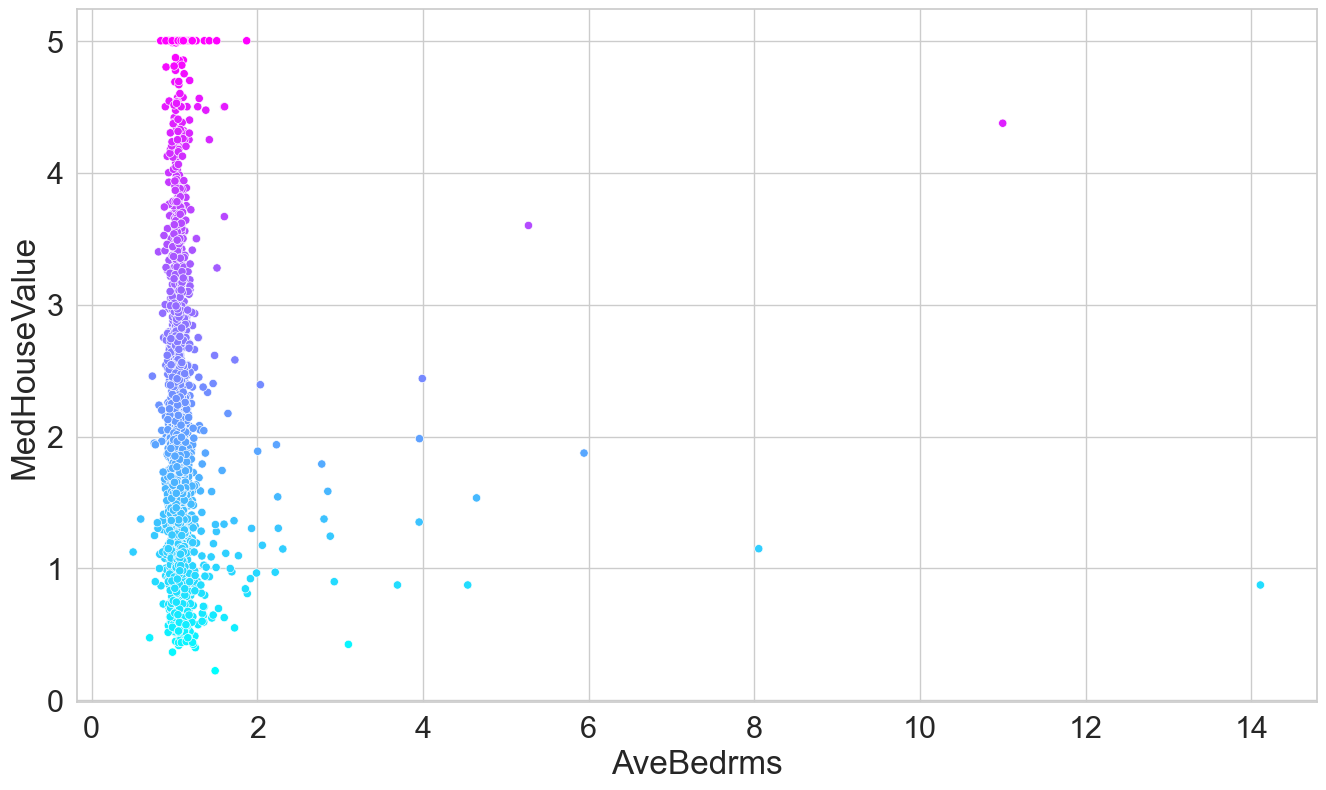

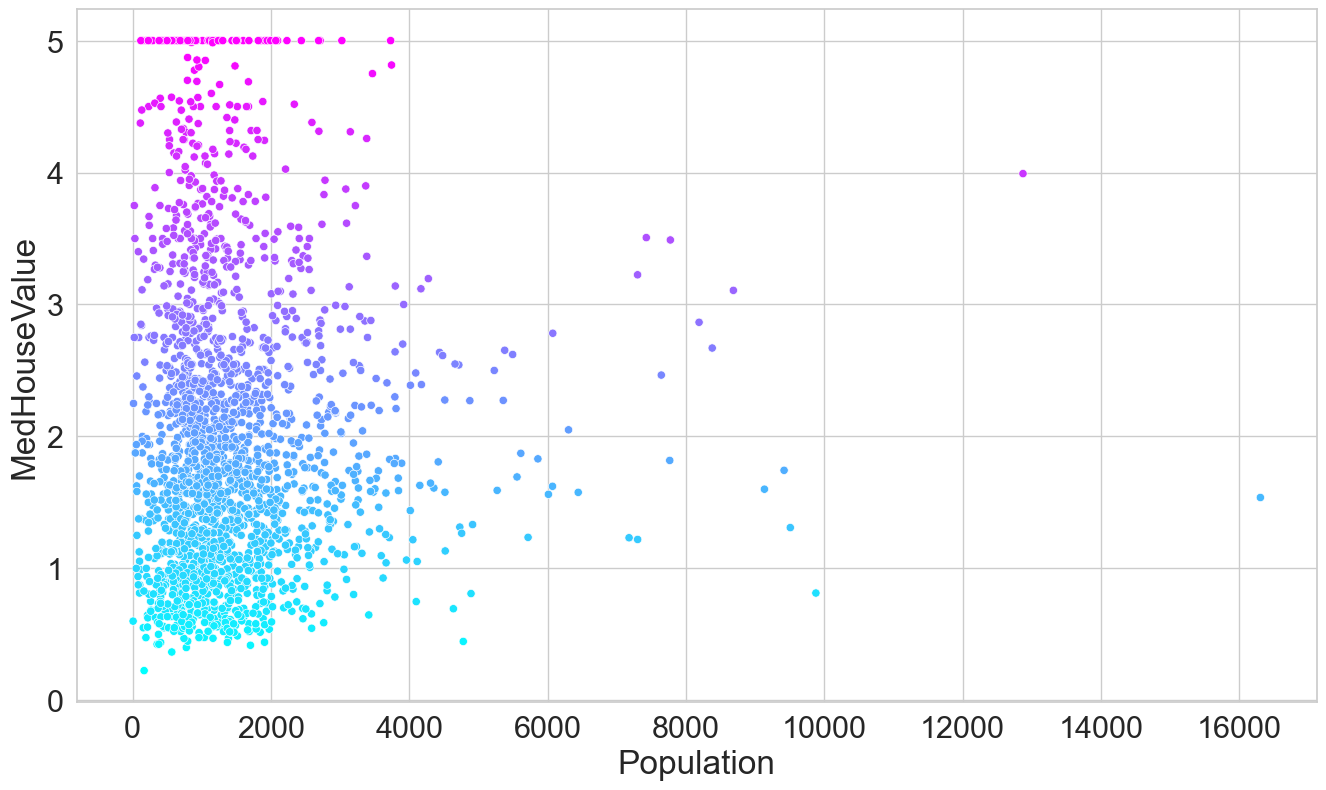

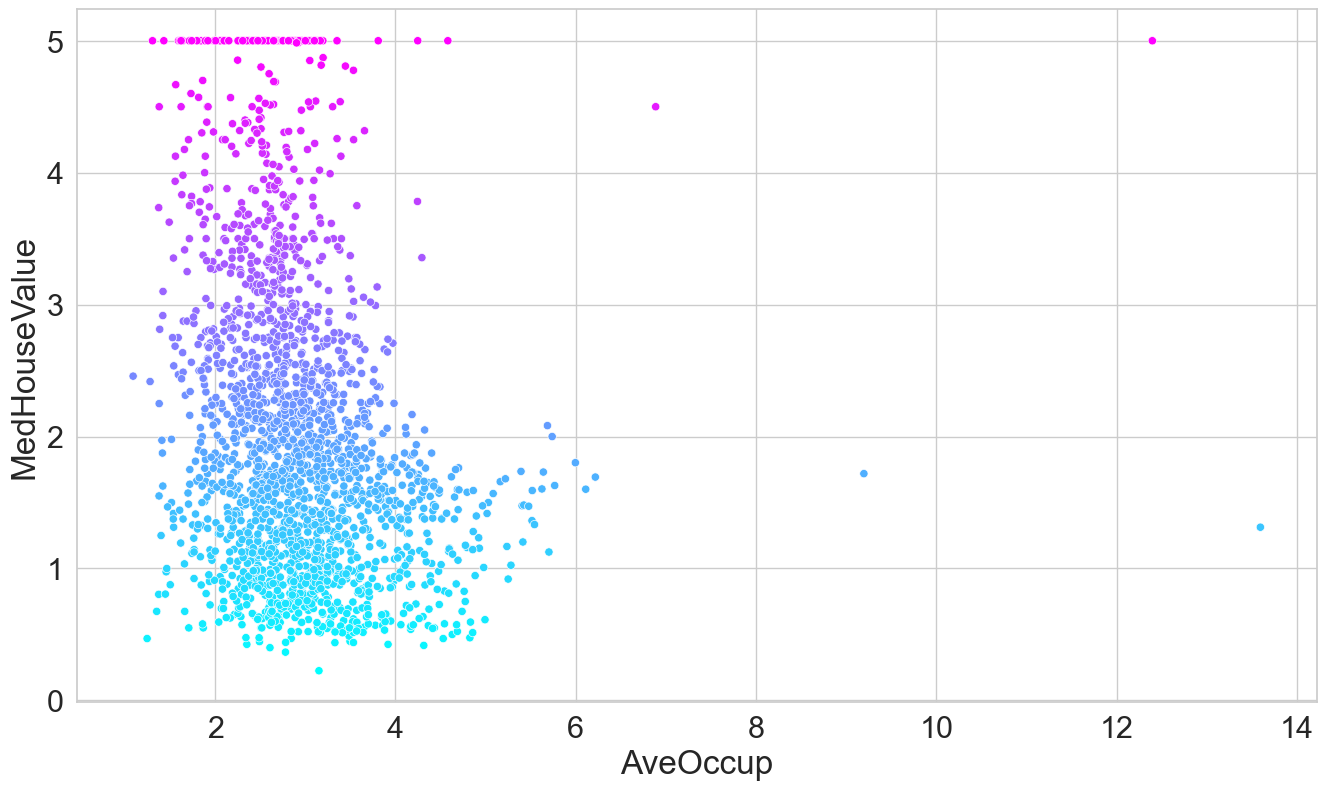

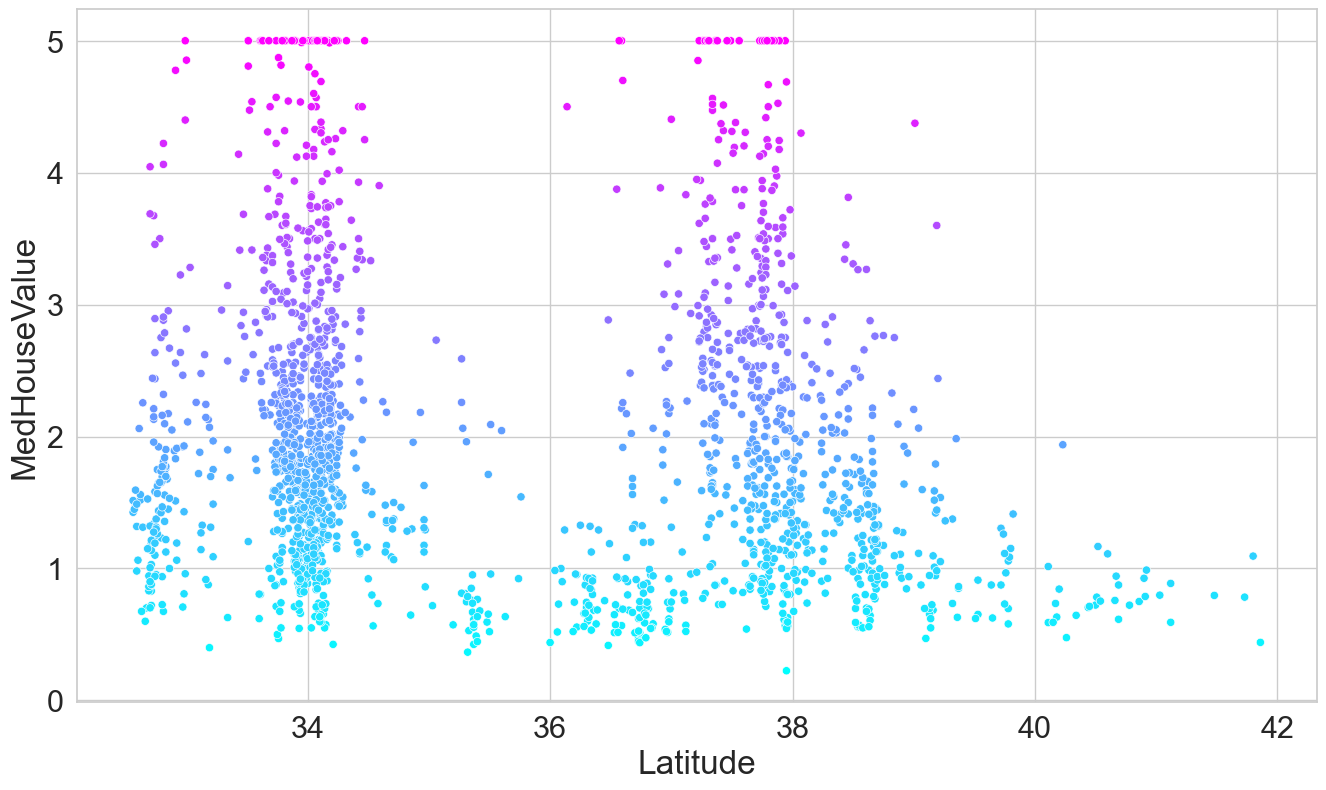

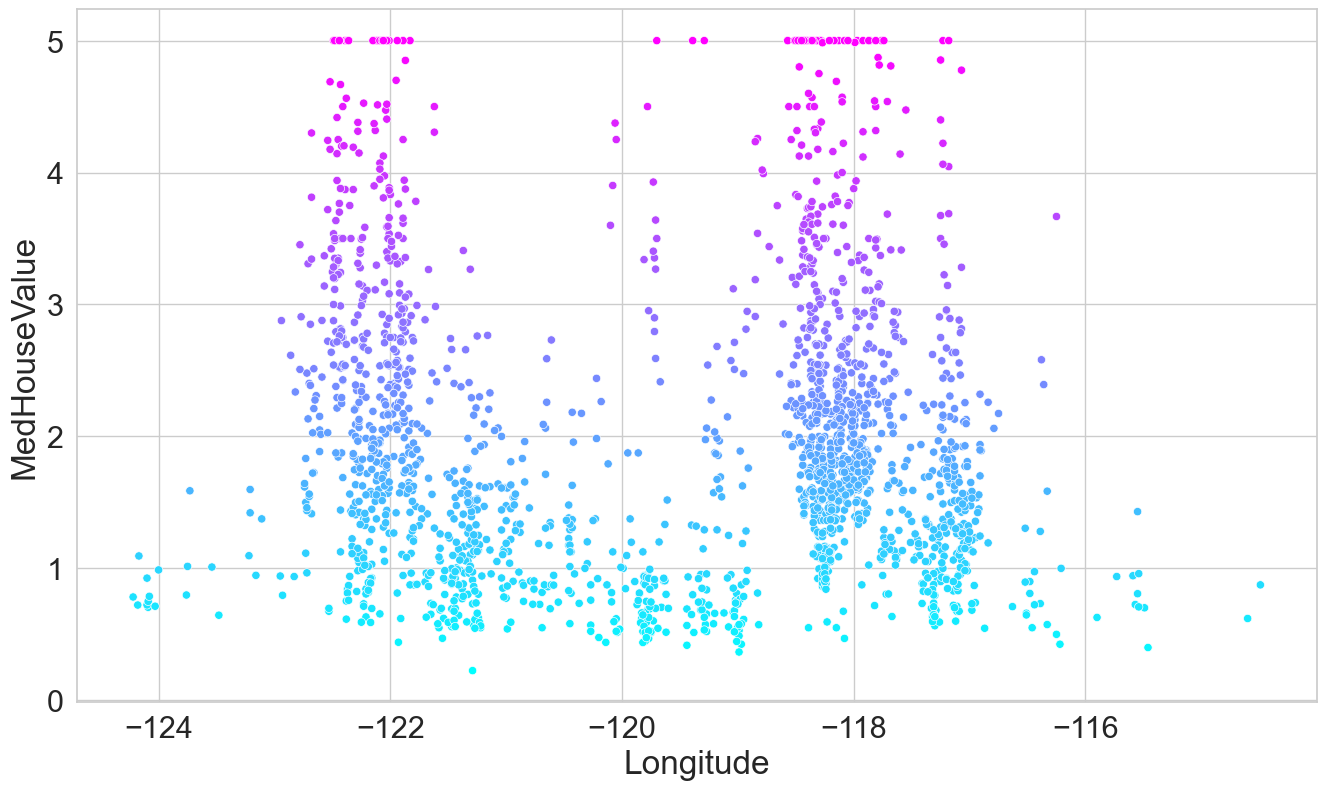

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,y='MedHouseValue',
                    hue='MedHouseValue', palette='cool', legend=False)

<Axes: xlabel='MedHouseValue', ylabel='Count'>

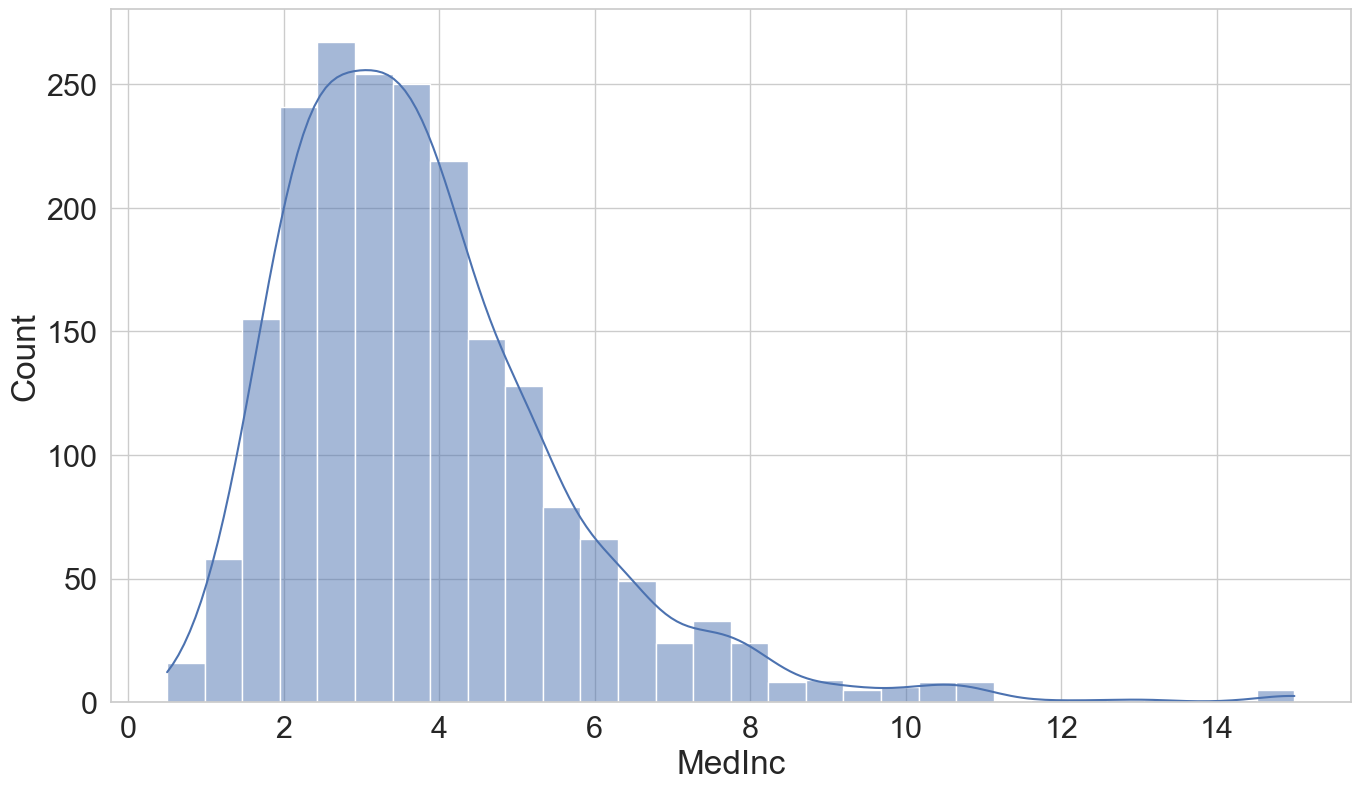

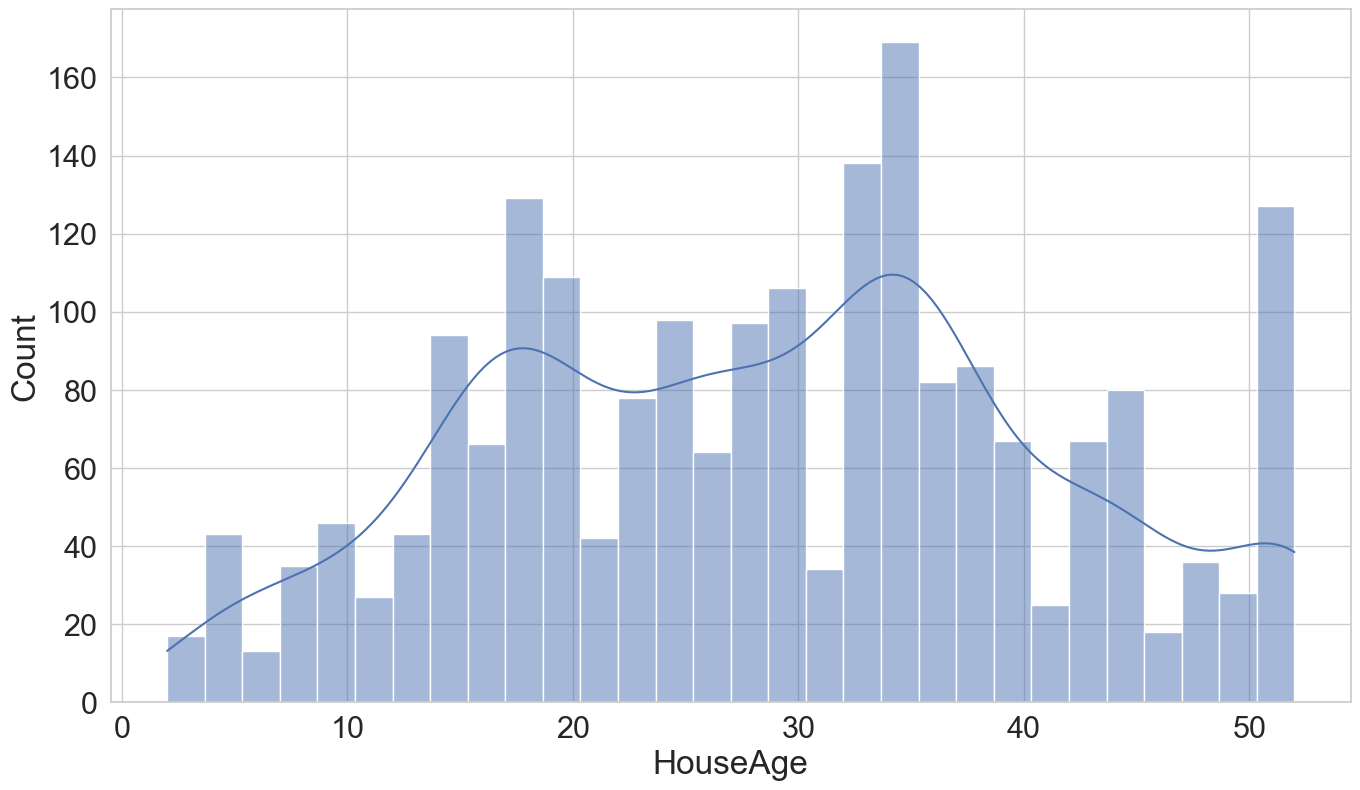

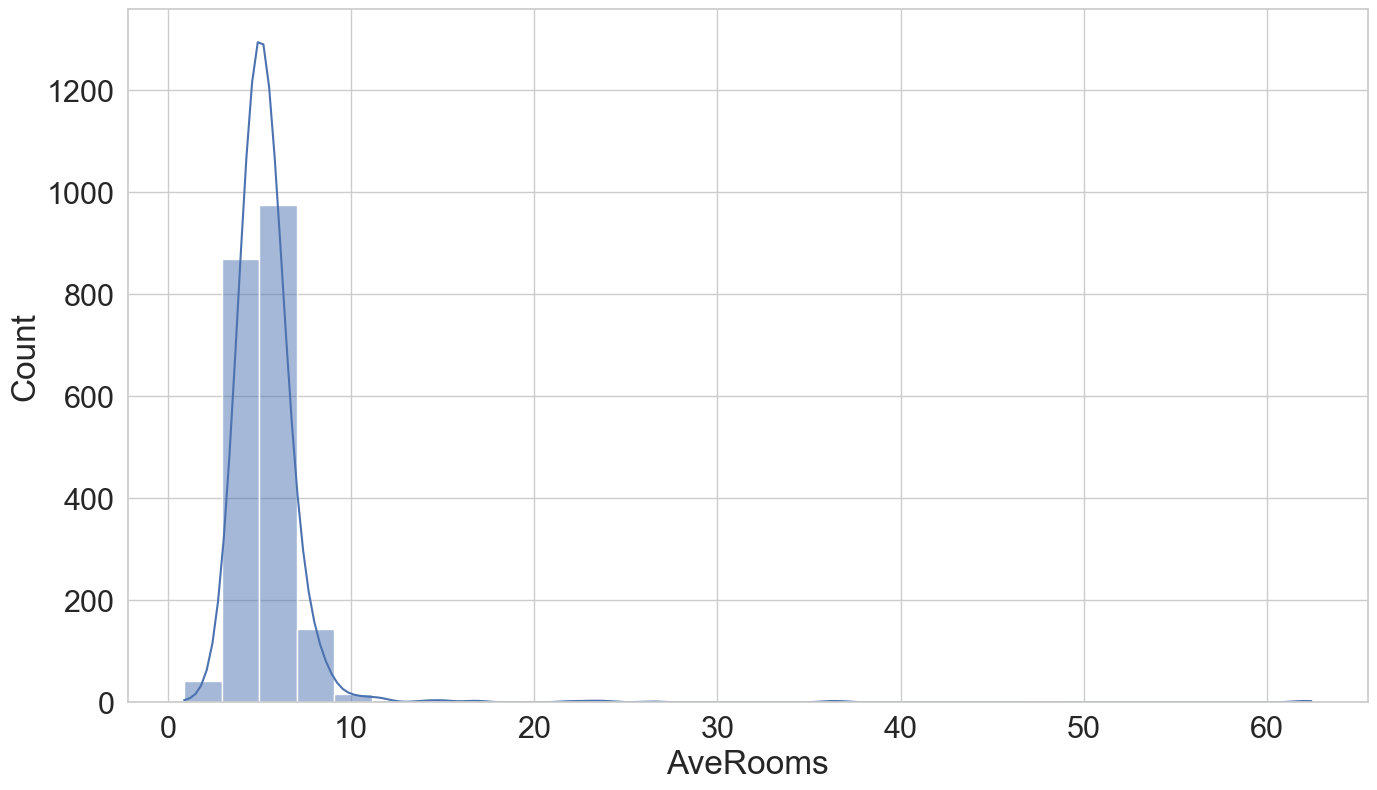

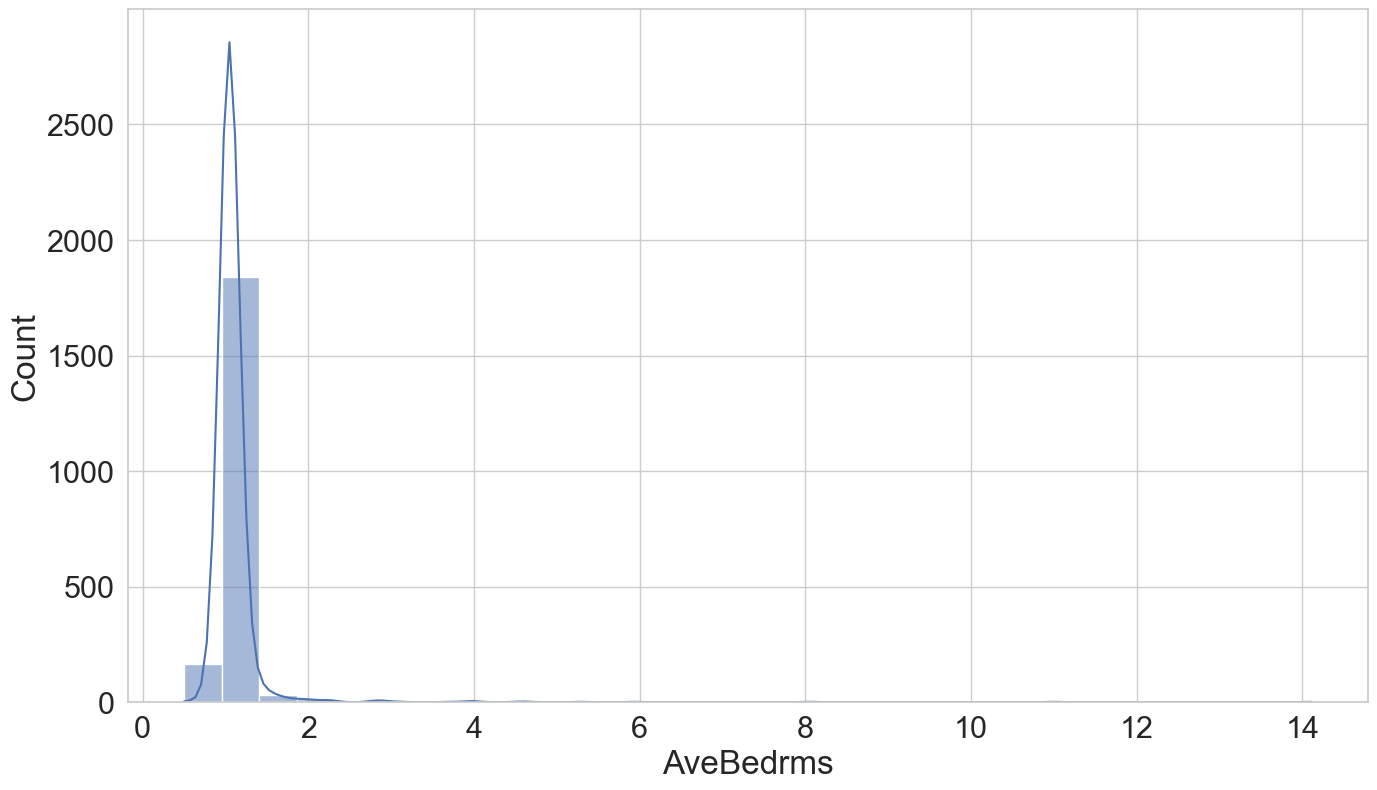

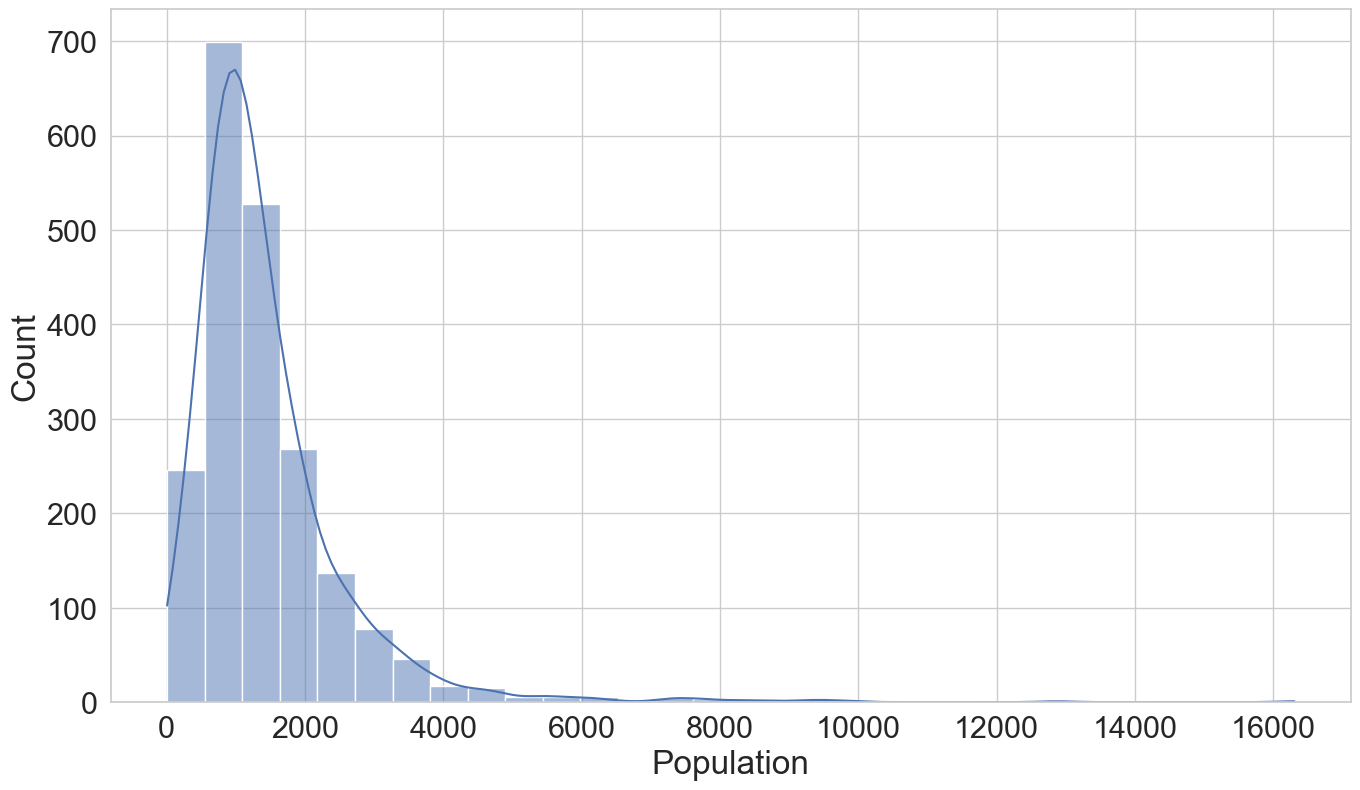

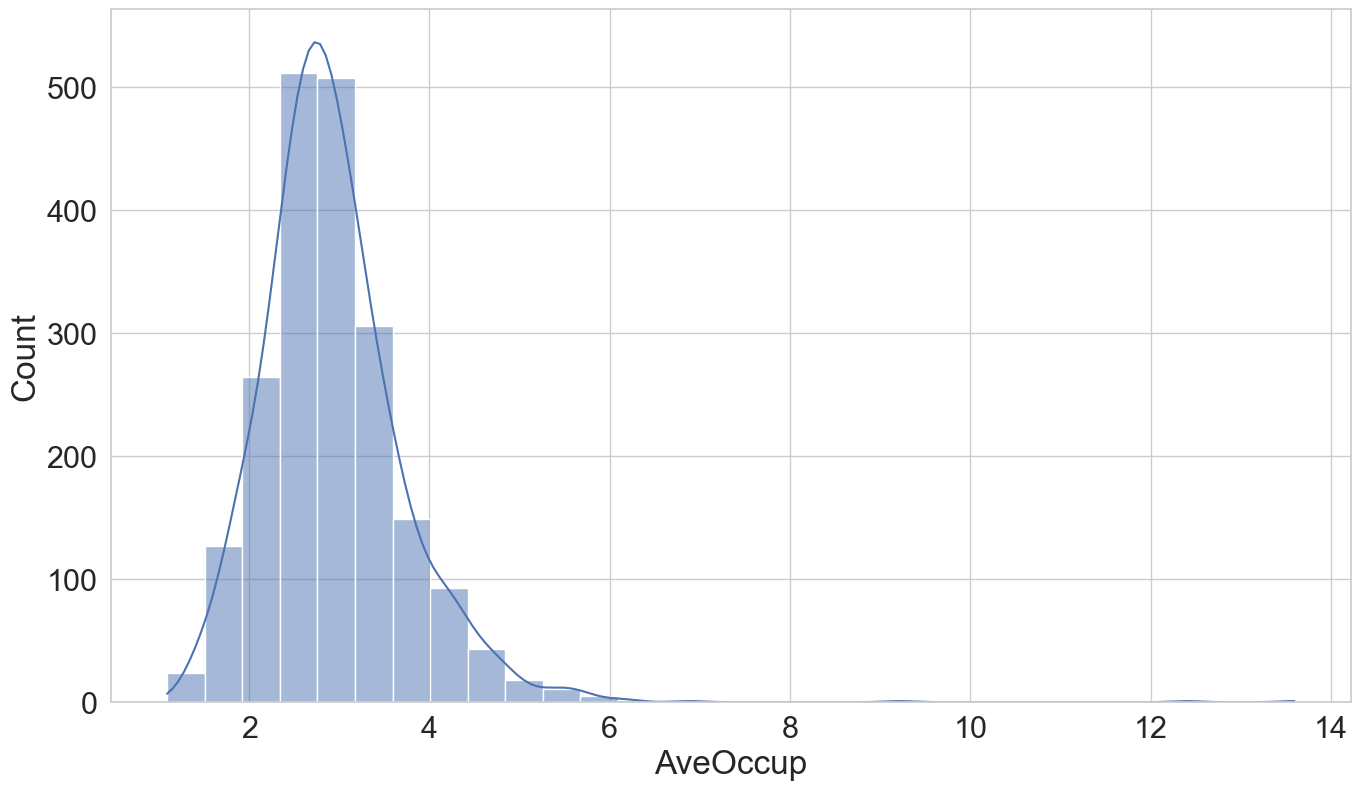

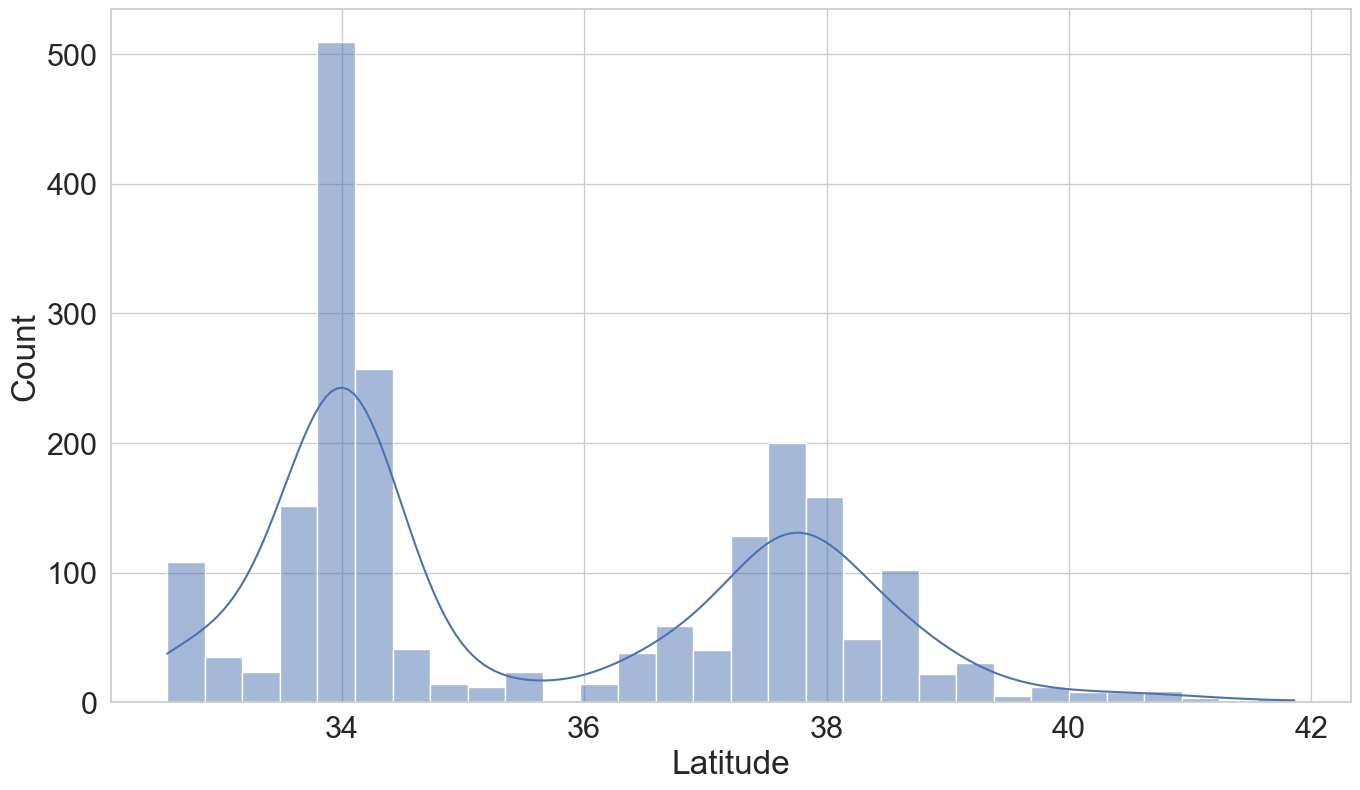

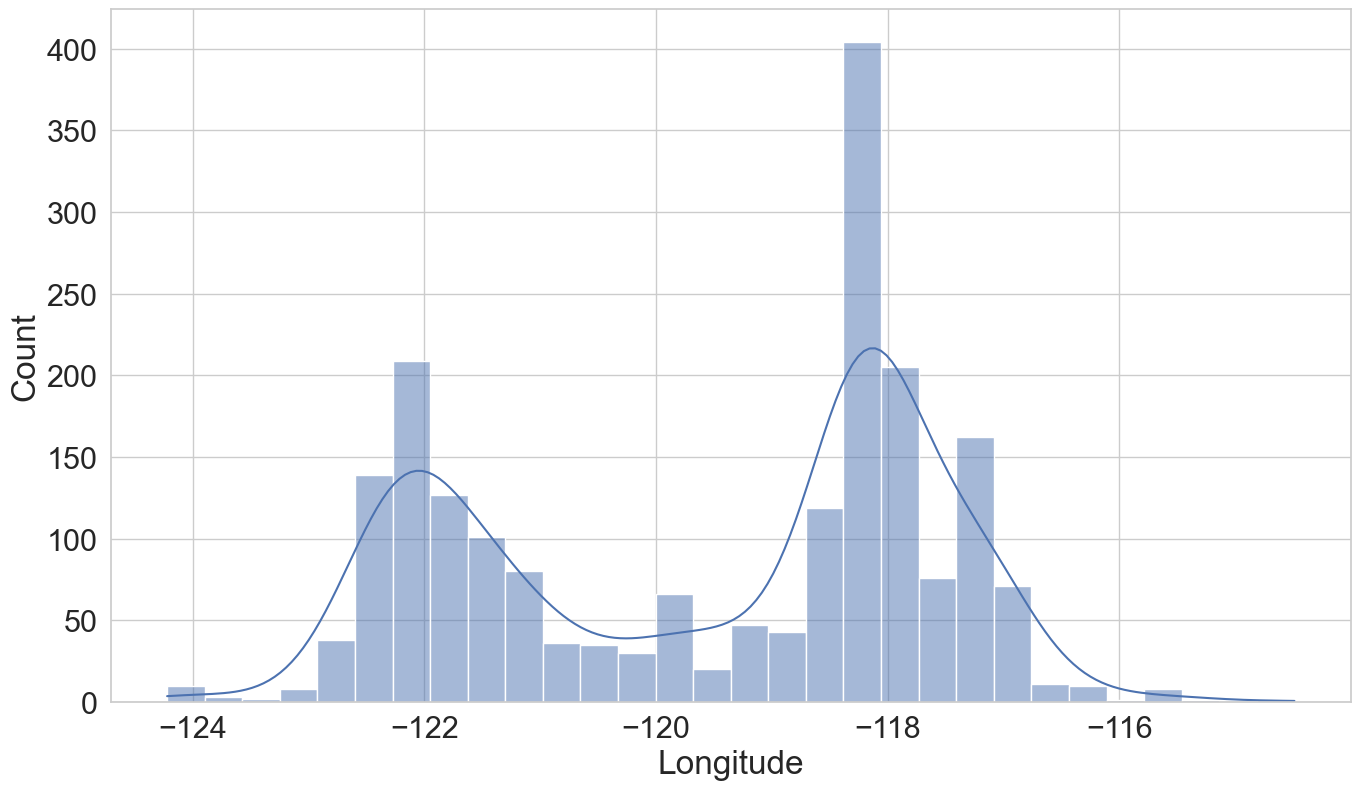

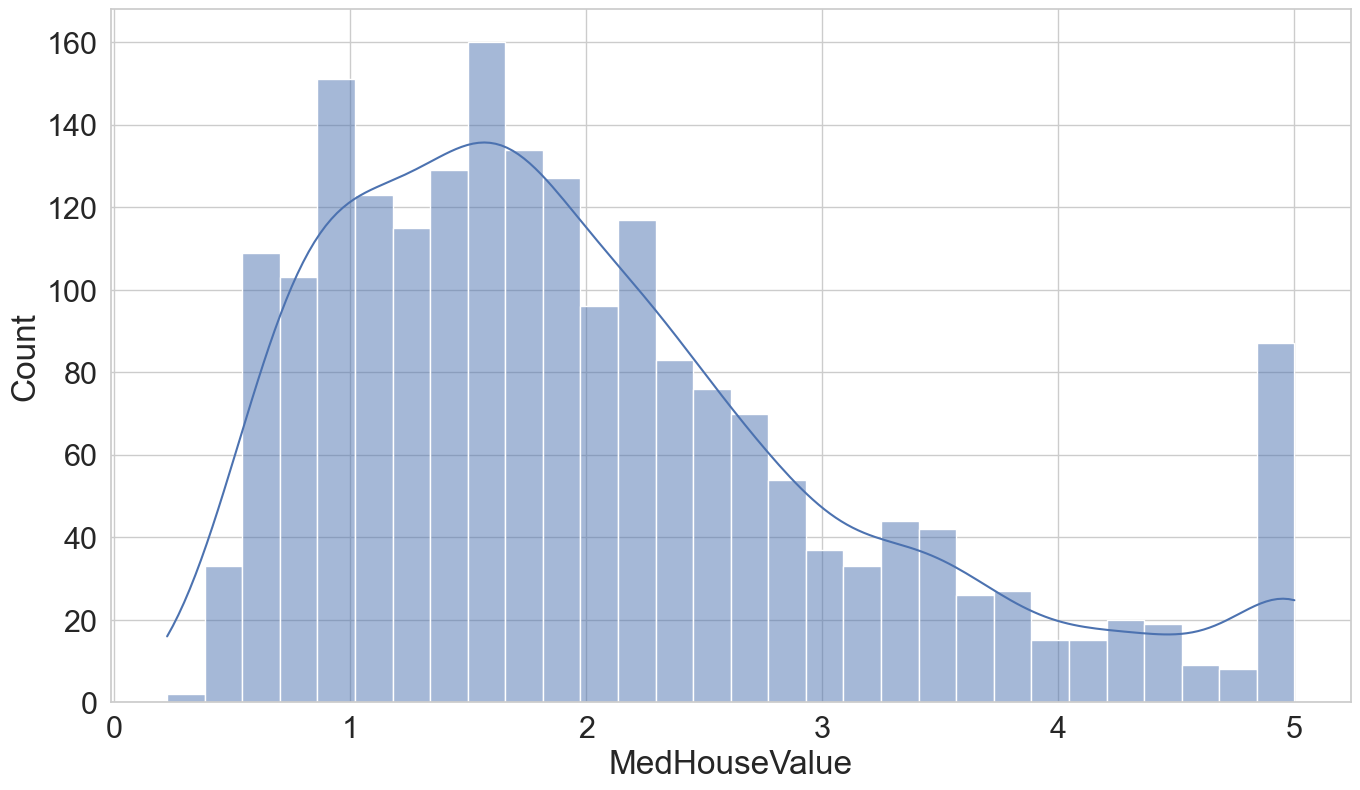

In [44]:
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.histplot(sample_df[feature], bins=30, kde=True)
plt.figure(figsize=(16, 9))
sns.histplot(sample_df['MedHouseValue'], bins=30, kde=True)

In [45]:
# check for missing values
california_df.isna().sum()


MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california_df.loc[:, california_df.columns != 'MedHouseValue'], california_df['MedHouseValue'], test_size=0.2, random_state=17)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


Fitting a Linear Regression Model in 3 ways (only with 'MedInc' feature):
    - Analytical Solution
    - Sequential Learning
    - Sklearn Linear Regression

In [47]:
# analytical solution
import numpy as np

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train['MedInc']]  # add intercept term
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

In [48]:
# sequential learning

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(X_train[['MedInc']], y_train)

SGDRegressor()

In [49]:
# Sklearn Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[['MedInc']], y_train)

LinearRegression()

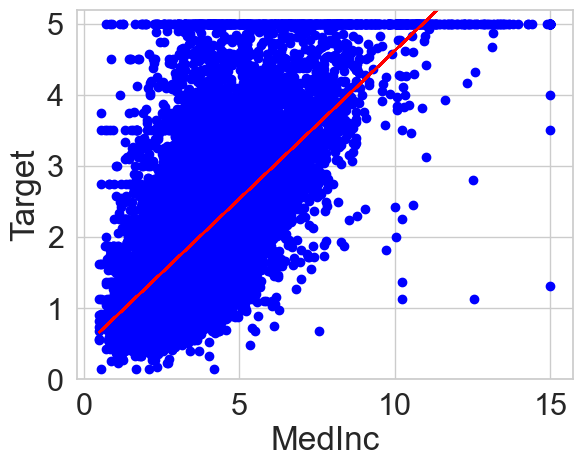

[1.70479075]
train score:  0.47209370868359146
test score:  0.4788799383198358


D:\Programs\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
plt.scatter(X_train['MedInc'], y_train, color='blue')
plt.plot(X_train['MedInc'], lin_reg.predict(X_train[['MedInc']]), color='red')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.ylim(0, 5.2)
plt.show()

prediction = lin_reg.predict([[3]])
print(prediction)

print("train score: ", lin_reg.score(X_train[['MedInc']], y_train))
print("test score: ", lin_reg.score(X_test[['MedInc']], y_test))

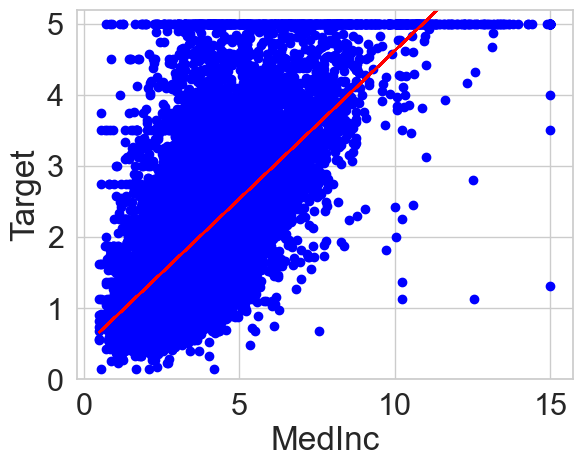

[1.70479075]
train score:  0.47209370868359146
test score:  0.4788799383198358


D:\Programs\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
X_train['2MedInc'] = X_train['MedInc'] * 2
X_test['2MedInc'] = X_test['MedInc'] * 2
lin_reg.fit(X_train[['MedInc', '2MedInc']], y_train)

plt.scatter(X_train['MedInc'], y_train, color='blue')
plt.plot(X_train['MedInc'], lin_reg.predict(X_train[['MedInc', '2MedInc']]), color='red')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.ylim(0, 5.2)
plt.show()

prediction = lin_reg.predict([[3, 6]])
print(prediction)

print("train score: ", lin_reg.score(X_train[['MedInc', '2MedInc']], y_train))
print("test score: ", lin_reg.score(X_test[['MedInc', '2MedInc']], y_test))

Adding again the same feature times 2 didn't improve the model, because the model is linear and the relationship between the features and the target variable is linear. 

In [52]:
X_train.drop('2MedInc', axis=1, inplace=True)
X_test.drop('2MedInc', axis=1, inplace=True)

In [53]:
lin_reg.fit(X_train, y_train)

print("train score: ", lin_reg.score(X_train, y_train))
print("test score: ", lin_reg.score(X_test, y_test))

print("train_mse: ", np.mean((lin_reg.predict(X_train) - y_train) ** 2))
print("test_mse: ", np.mean((lin_reg.predict(X_test) - y_test) ** 2))

train score:  0.6069093522861393
test score:  0.602736449673441
train_mse:  0.5257523422822419
test_mse:  0.5194536584827973


In [55]:
X_train_no_pop = X_train.drop(columns='Population')
X_test_no_pop = X_test.drop(columns='Population')
lin_reg.fit(X_train_no_pop, y_train)

print("train score: ", lin_reg.score(X_train_no_pop, y_train))
print("test score: ", lin_reg.score(X_test_no_pop, y_test))

print("train_mse: ", np.mean((lin_reg.predict(X_train_no_pop) - y_train) ** 2))
print("test_mse: ", np.mean((lin_reg.predict(X_test_no_pop) - y_test) ** 2))

train score:  0.6069041129889314
test score:  0.602697919792018
train_mse:  0.5257593497569679
test_mse:  0.5195040393643295


The result is a little lower without using population feature.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train[['MedInc']])
X_poly

array([[ 3.1327    ,  9.81380929],
       [ 2.6523    ,  7.03469529],
       [ 5.8704    , 34.46159616],
       ...,
       [ 2.5875    ,  6.69515625],
       [ 3.087     ,  9.529569  ],
       [ 4.1       , 16.81      ]])

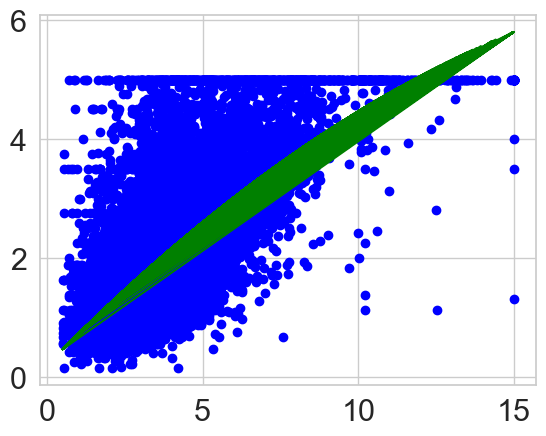

In [59]:
lin_reg.fit(X_poly, y_train)

plt.scatter(X_train['MedInc'], y_train, color='blue')
plt.plot(X_train['MedInc'], lin_reg.predict(X_poly), color='red')
plt.show()

In [66]:
print("train score: ", lin_reg.score(X_poly, y_train))
print("test score: ", lin_reg.score(poly_features.transform(X_test[['MedInc']]), y_test))

print("train_mse: ", np.mean((lin_reg.predict(X_poly) - y_train) ** 2))
print("test_mse: ", np.mean((lin_reg.predict(poly_features.transform(X_test[['MedInc']])) - y_test) ** 2))

train score:  0.47681718639234283
test score:  0.48285344695659405
train_mse:  0.6997484964238194
test_mse:  0.6762102103989724


Improve on only using 'MedInc' feature.

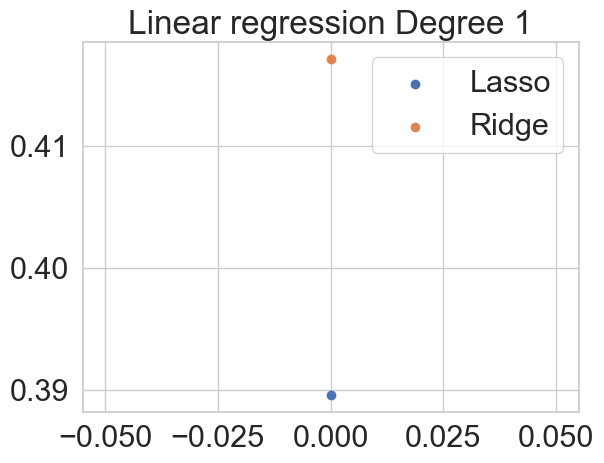

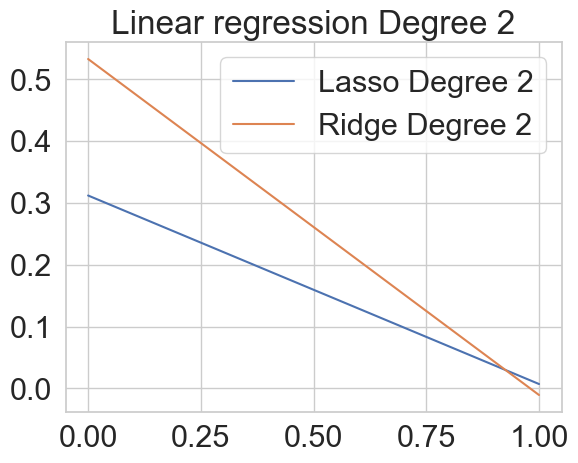

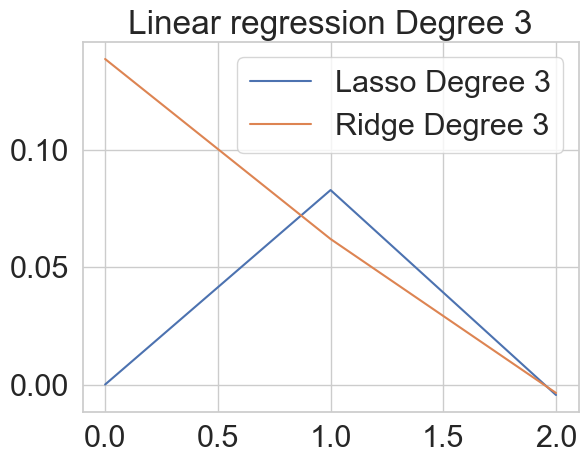

D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.384e+01, tolerance: 2.208e+00
  model = cd_fast.enet_coordinate_descent(


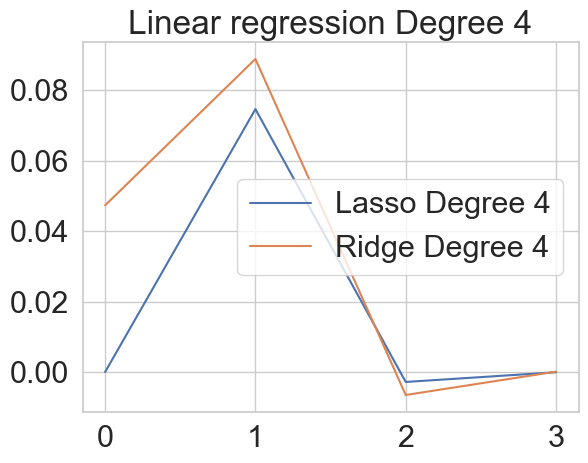

D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.217e+03, tolerance: 2.208e+00
  model = cd_fast.enet_coordinate_descent(


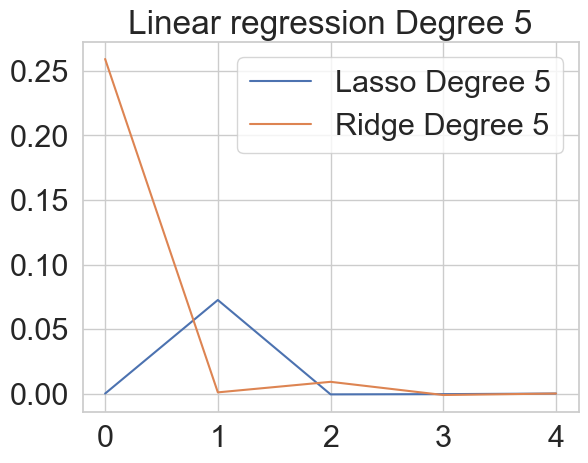

D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.694e+03, tolerance: 2.208e+00
  model = cd_fast.enet_coordinate_descent(


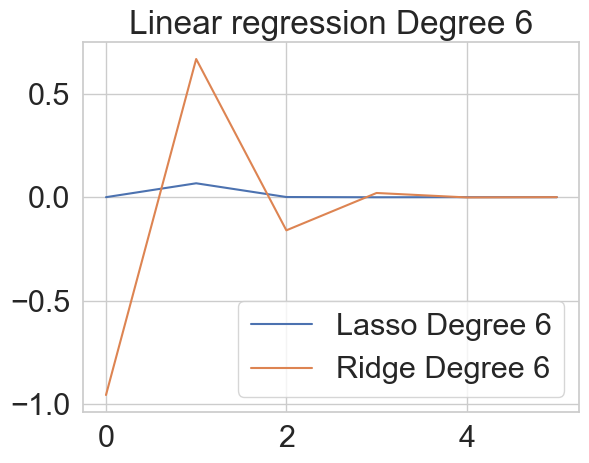

D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.784e+03, tolerance: 2.208e+00
  model = cd_fast.enet_coordinate_descent(
D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.30238e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


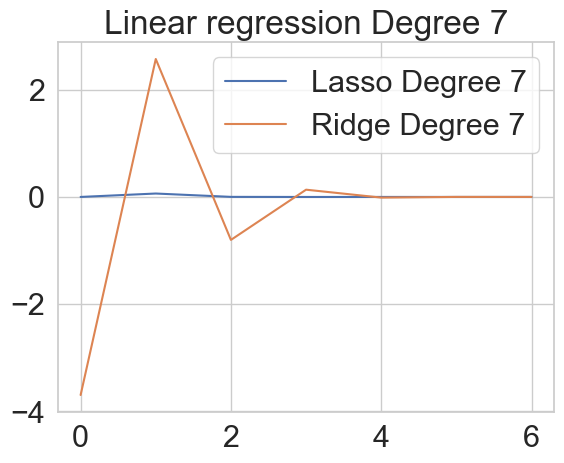

In [81]:
from sklearn.linear_model import Lasso, Ridge

lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1)

degrees = [1, 2, 3, 4, 5, 6, 7]

for d in degrees:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X_train[['MedInc']])

    lasso_reg.fit(X_poly, y_train)
    ridge_reg.fit(X_poly, y_train)

    if d ==1:
        plt.scatter(range(d), lasso_reg.coef_, label='Lasso')
        plt.scatter(range(d), ridge_reg.coef_, label='Ridge')
    else:
        plt.plot(lasso_reg.coef_, label=f'Lasso Degree {d}')
        plt.plot(ridge_reg.coef_, label=f'Ridge Degree {d}')
        
    plt.legend()
    plt.title(f'Linear regression Degree {d}')
    plt.show()

In [85]:
lasso_reg = Lasso(alpha=0.1)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lasso_reg.fit(X_poly, y_train)

print("train score: ", lasso_reg.score(X_poly, y_train))
print("test score: ", lasso_reg.score(poly_features.transform(X_test), y_test))


train score:  0.687673874505806
test score:  0.663448760582383


D:\Programs\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e+03, tolerance: 2.208e+00
  model = cd_fast.enet_coordinate_descent(
